In [ ]:

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree

import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier


#from scikitplot.metrics import plot_roc_curve as auc_roc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt


##UPLOAD CSV FILE

In [ ]:
data =  pd.read_csv('/content/Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.shape

(400, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


##DATA PRE-PROCESSSING

we notice that the Gender attr is not a numeric feature. Hence, we wiil map Male--> 0__________________ F--> 1

In [ ]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first=True) # Drop_first means keep only one option (Gender Male)


Also, removing User ID faeture, it is not useful for our classification

In [ ]:
data.drop("User ID",axis=1,inplace=True)

In [ ]:
data

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


Detecting missing values 

In [ ]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Gender_Male        0
dtype: int64

Detecting duplicated data

In [ ]:

r,c =data.shape

temp = data.copy()
temp.drop_duplicates(inplace=True)
temp.reset_index(drop=True,inplace=True)

if temp.shape==(r,c):
    print(' The dataset doesn\'t have any duplicates')
else:
    print('Duplicates have been dropped ')
    data= temp.copy()

Duplicates have been dropped 


20 records have been dropped

In [ ]:
data.shape

(380, 4)


---


REMOVE OUTLIERS

---



In [ ]:
from scipy.stats import zscore
z_scores = zscore(data)

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = data[filtered_entries]


In [ ]:
new_df.shape

(380, 4)

No outliers have been deteted

the target variable is 'Purchased'

In [ ]:
print(data["Purchased"].value_counts())

0    240
1    140
Name: Purchased, dtype: int64


##DATA VISUALIZATION

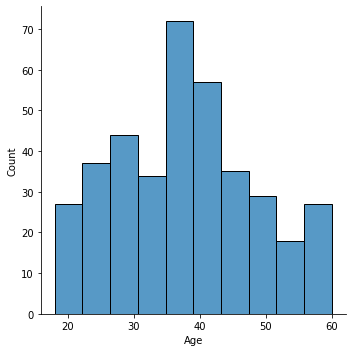

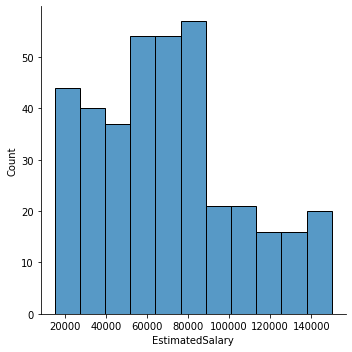

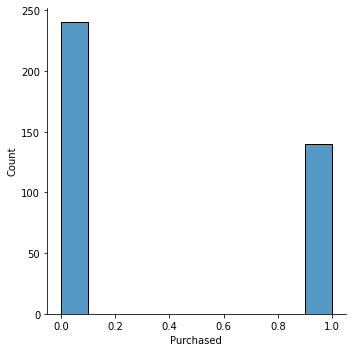

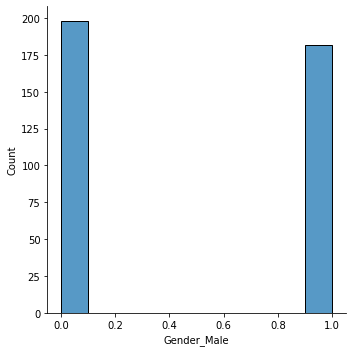

In [ ]:


# creating a for loop to get the distribution plot for all columns
for column in data:
  sns.displot(x=column, data=data)



Fixing the imbalance using SMOTE Technique


In [ ]:

temp = data.copy()

print('Original class distribution:')
print(temp["Purchased"].value_counts())

X = temp.drop(["Purchased"],axis=1)
Y = temp["Purchased"]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

temp = pd.DataFrame(X, columns=temp.columns)
temp["Purchased"] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())
data = temp.copy()

Original class distribution:
0    240
1    140
Name: Purchased, dtype: int64

Class distribution after applying SMOTE Technique:
0    240
1    240
Name: Purchased, dtype: int64


In [ ]:
data.shape

(480, 4)

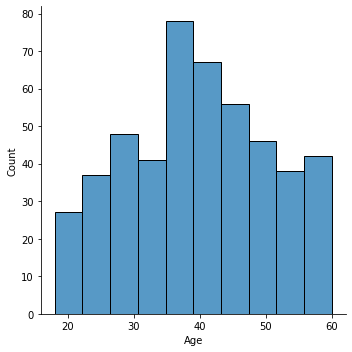

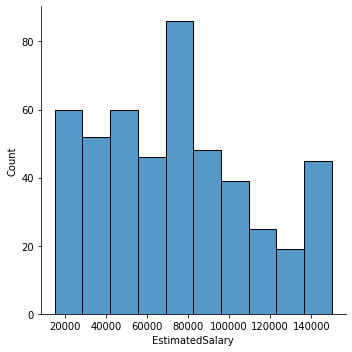

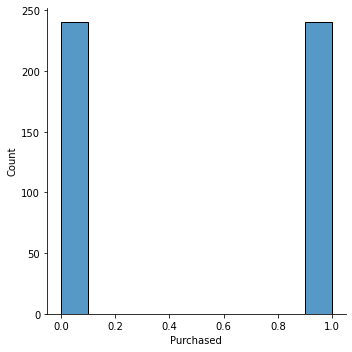

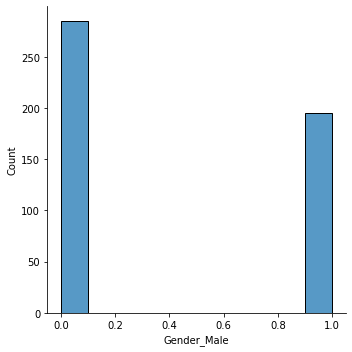

In [ ]:

# creating a for loop to get the distribution plot for all columns after using SMOTE
for column in data:
  sns.displot(x=column, data=data)



##SPLITING THE DATA INTO 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X = data.drop(["Purchased"],axis=1)
Y = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print( X_train.shape, X_test.shape)

(384, 3) (96, 3)


In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Xx_train_std = scaler.fit_transform(X_train)
x_train_std= pd.DataFrame(Xx_train_std, columns=X.columns)

Xx_test_std = scaler.transform(X_test)
x_test_std= pd.DataFrame(Xx_test_std, columns=X.columns)


In [ ]:
X.columns

Index(['Age', 'EstimatedSalary', 'Gender_Male'], dtype='object')

## DECISION TREE CLASSIFIER

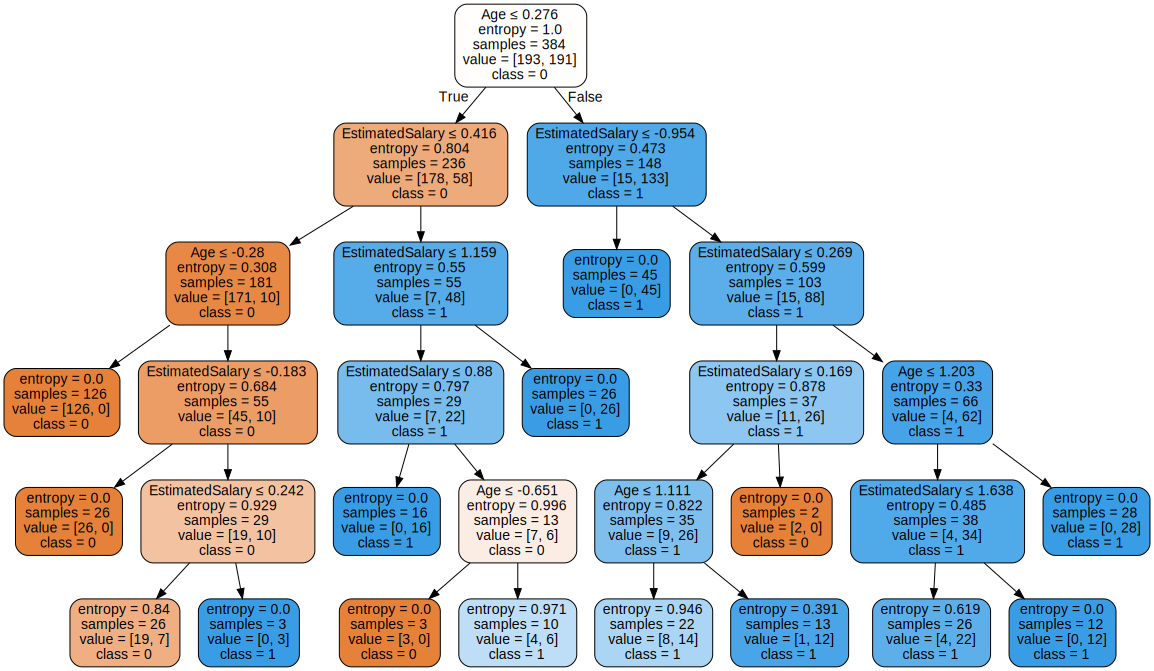

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
DT = DT.fit(x_train_std, y_train)


#Vizualizing the tree
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(DT, out_file= None, 
                                feature_names=feature_names,
                                class_names=['0','1'],
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph


[[44  3]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        47
           1       0.93      0.86      0.89        49

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96



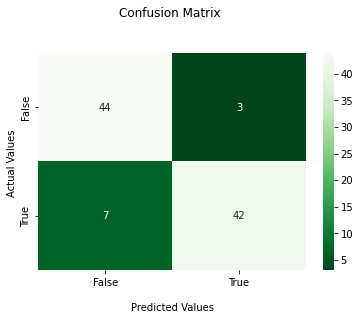

In [ ]:
#model evaluation
y_test_pred = DT.predict(x_test_std)               
infoG_matrix = confusion_matrix(y_test, y_test_pred)
print (infoG_matrix) 

print(classification_report(y_test, y_test_pred))


import seaborn as sns

ax = sns.heatmap(infoG_matrix, annot=True, cmap='Greens_r')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_test_pred)*100)

Accuracy: 89.58333333333334


without pre-pruning

---



---



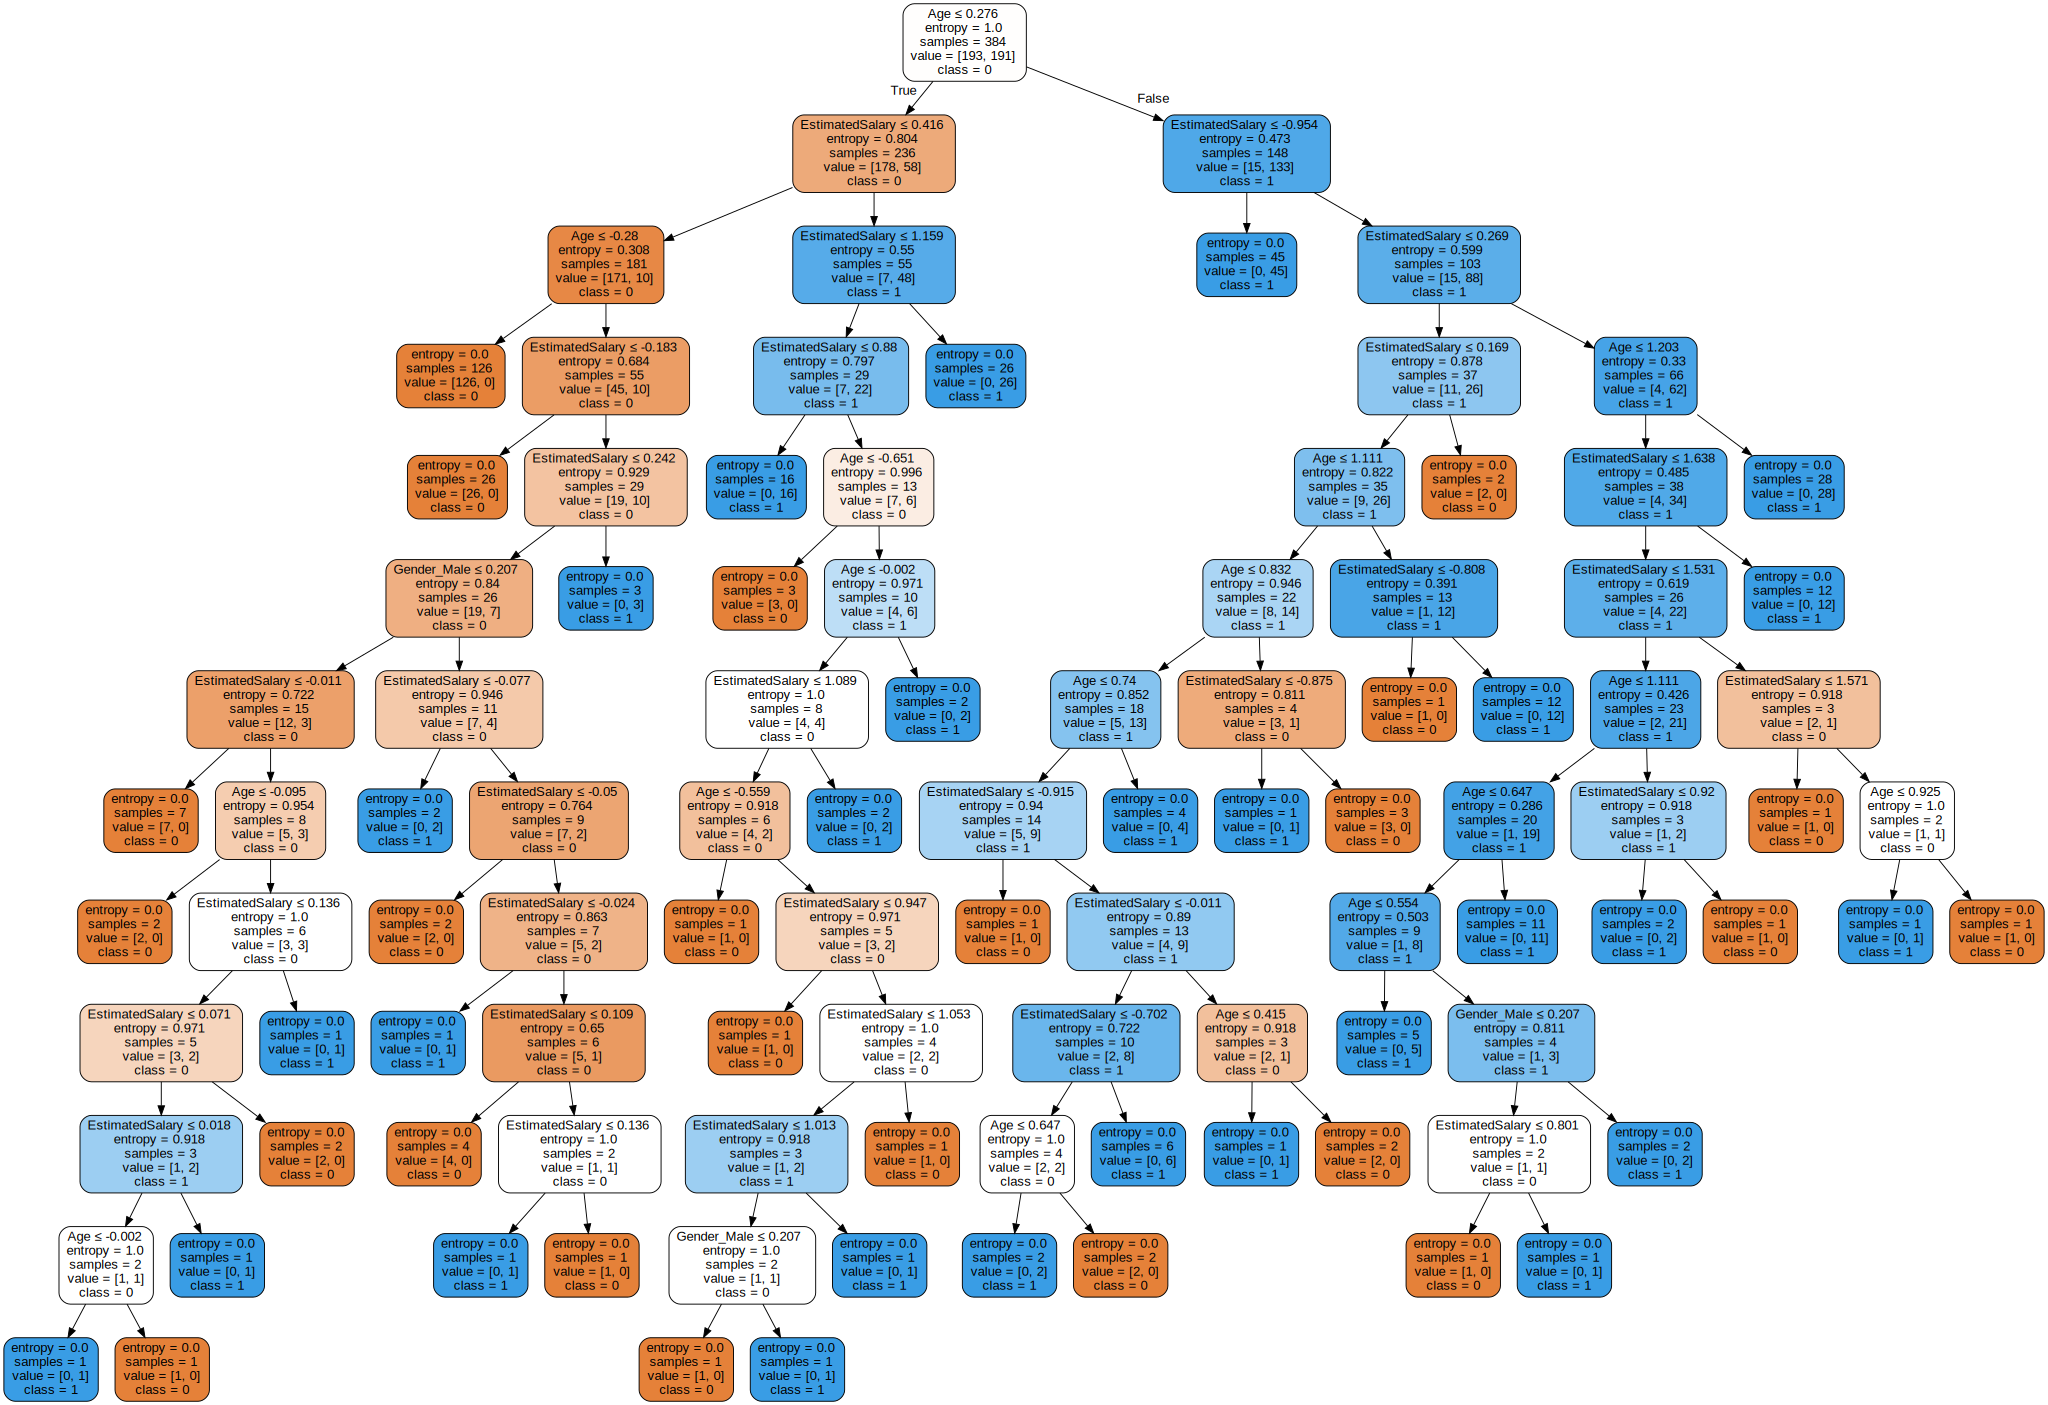

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 

# Information gain
DT = tree.DecisionTreeClassifier(criterion="entropy")
DT = DT.fit(x_train_std, y_train)


#Vizualizing the tree
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(DT, out_file= None, 
                                feature_names=feature_names,
                                class_names=['0','1'],
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph


[[40  7]
 [11 38]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.84      0.78      0.81        49

    accuracy                           0.81        96
   macro avg       0.81      0.81      0.81        96
weighted avg       0.82      0.81      0.81        96



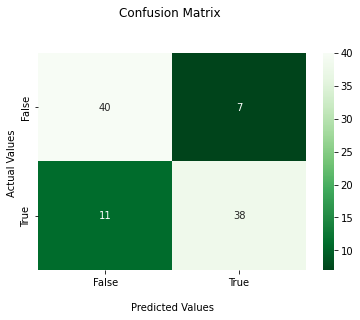

In [ ]:
#model evaluation
y_test_pred = DT.predict(x_test_std)               
infoG_matrix = confusion_matrix(y_test, y_test_pred)
print (infoG_matrix) 

print(classification_report(y_test, y_test_pred))


import seaborn as sns

ax = sns.heatmap(infoG_matrix, annot=True, cmap='Greens_r')

ax.set_title('Confusion Matrix \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_test_pred)*100)

Accuracy: 81.25


In [ ]:
#Visualising Function
def AUC_ROC_plot(y_test, y_test_pred):    
    ref = [0 for _ in range(len(y_test))]
    ref_auc = roc_auc_score(y_test, ref)
    lr_auc = roc_auc_score(y_test, y_test_pred)

    ns_fpr, ns_tpr, _ = roc_curve(y_test, ref)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, y_test_pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(y_test, y_test_pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

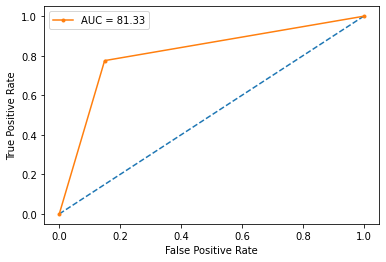

In [ ]:
AUC_ROC_plot(y_test, y_test_pred)

In [ ]:
from sklearn.metrics import roc_auc_score
auc_valid = roc_auc_score(y_test, y_test_pred)

print("AUC Valid = {}".format( round(auc_valid,4)))

AUC Valid = 0.8133


## DT WITH GINI IMPURITY

In [ ]:
# Create and initialise a DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6, random_state = 0)

# Train the classifier by calling a method 'fit()'
dt.fit(x_train_std, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [ ]:


# Calculate the predicted vlaue by calling a method predict()
y_pred = dt.predict(x_test_std)


In [ ]:

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(dt.score(x_train_std, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(dt.score(x_test_std, y_test)))



Train set accuracy: 0.95
Test set accuracy: 0.86


              precision    recall  f1-score   support

           0       0.81      0.94      0.87        47
           1       0.93      0.80      0.86        49

    accuracy                           0.86        96
   macro avg       0.87      0.87      0.86        96
weighted avg       0.87      0.86      0.86        96



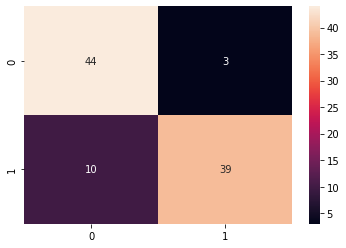

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

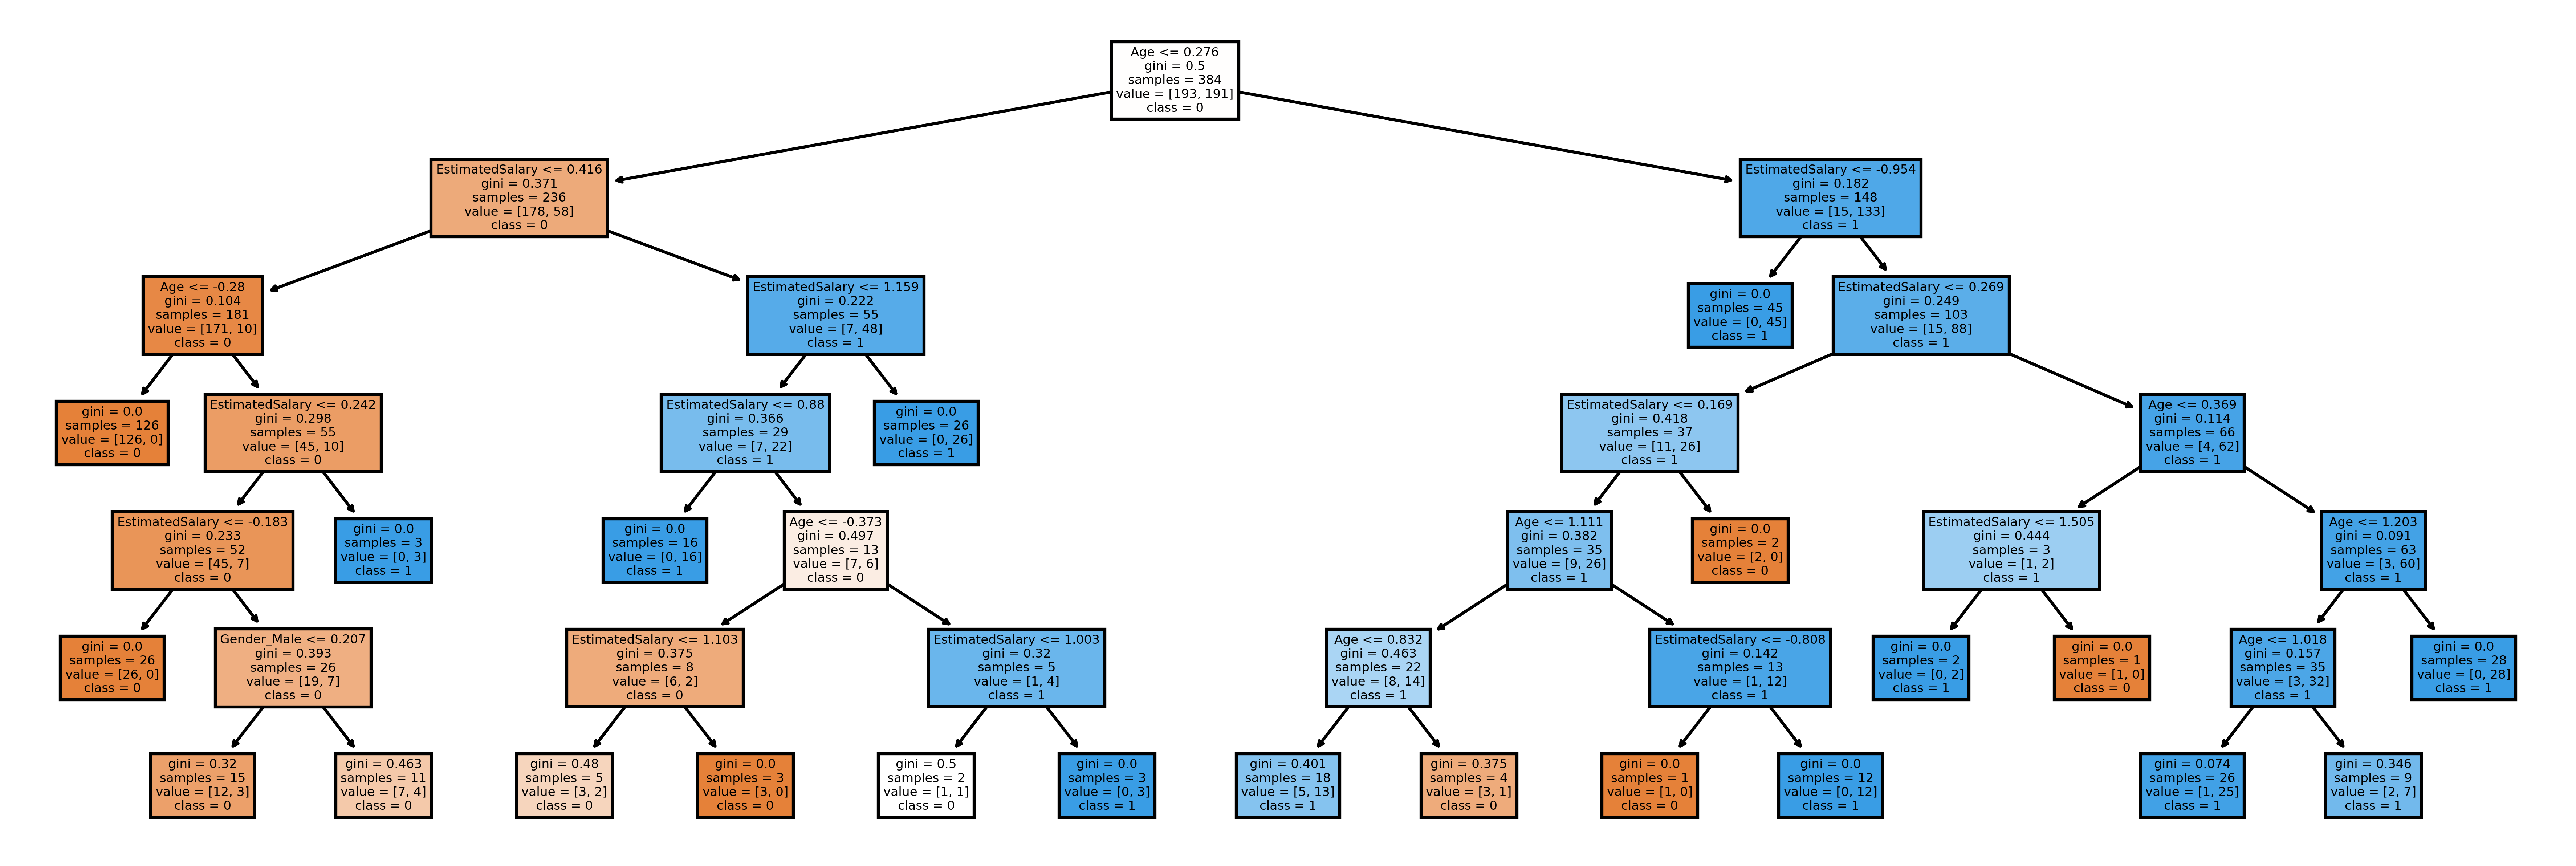

In [ ]:


# Column names for dataset
fn=['Age', 'EstimatedSalary', 'Gender_Male']

# Classes of the Output variable
cn=['0','1']

# Setting dpi = 600 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5), dpi=600)

# Plot tree using tree library
tree.plot_tree(dt, # Decision Tree model
           feature_names = fn, # Feature names define above
           class_names=cn, # Classes defined above
           filled = True); 



##SVM CLASSIFIER

In [ ]:
from sklearn.svm import SVC


In [ ]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
g=GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1,0.1,0.01,0.001,0.0001,1.1,1.2],'kernel': ('linear', 'rbf')})
 
g.fit(x_train_std,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.1, 1.2],
                         'kernel': ('linear', 'rbf')})

In [ ]:
g.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
g.best_estimator_

SVC(C=1, gamma=1)

In [ ]:
grid_pred = g.predict(x_test_std)

[[45  2]
 [ 3 46]]


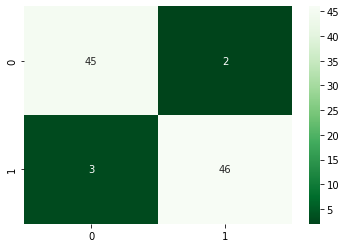

In [ ]:
print(confusion_matrix(y_test,grid_pred))
sns.heatmap(confusion_matrix(y_test,grid_pred), annot=True, fmt='d', cmap='Greens_r')
plt.show()

In [ ]:

# Print train set accuracy
print("Train set accuracy: {:.2f}".format(g.score(x_train_std, y_train)))

# Print test set accuracy
print("Test set accuracy: {:.2f}".format(g.score(x_test_std, y_test)))



Train set accuracy: 0.92
Test set accuracy: 0.95


#BUILDING A NEURAL NETWORK 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential,Model
from keras.layers import Activation, Dense, Dropout, Flatten, Input, Add
from sklearn.metrics import roc_curve
from keras.callbacks import Callback



---
spliting the tes size into a validation set and test set

---




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=2)
X_train_std = scaler.fit_transform(X_train)
x_train= pd.DataFrame(X_train_std, columns=X.columns)

X_test_std = scaler.transform(X_test)
x_test= pd.DataFrame(X_test_std, columns=X.columns)

In [ ]:
print( X_train.shape, X_test.shape)

(432, 3) (48, 3)


In [ ]:

# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(3,)),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
# compiling the Neural Network

model.compile(optimizer = keras.optimizers.Adam(lr=0.001),
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

#history = model.fit(x_train, y_train, validation_split=0.1, epochs=30)

callback= tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 15)
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20,     callbacks=[callback])



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
13/13 [==============================] - 1s 18ms/step - loss: 0.8010 - accuracy: 0.4407 - val_loss: 0.8292 - val_accuracy: 0.3864
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.4613 - val_loss: 0.7782 - val_accuracy: 0.4318
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.7199 - accuracy: 0.4948 - val_loss: 0.7306 - val_accuracy: 0.4773
Epoch 4/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6848 - accuracy: 0.5722 - val_loss: 0.6894 - val_accuracy: 0.5909
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6366 - val_loss: 0.6506 - val_accuracy: 0.6818
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6907 - val_loss: 0.6147 - val_accuracy: 0.7273
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.7036 - val_loss: 0.5820 - val_accuracy: 0.7273
Epoch 8/20
13/13 [=

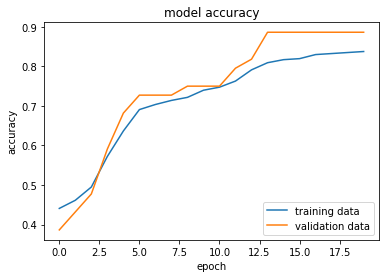

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')





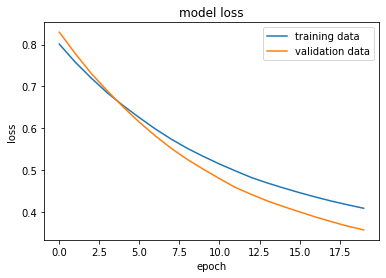

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.4531 - accuracy: 0.8542
0.8541666865348816
